In [3]:
import shapely.wkt as sw
import shapely
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
def calc_format(polygon):
    vertices = polygon.exterior.coords[:-1]
    langles = []
    n = len(vertices)
    v1 = (vertices[1][0] - vertices[0][0], vertices[1][1] - vertices[0][1])
    v2 = (vertices[-1][0] - vertices[0][0], vertices[-1][1] - vertices[0][1])
    angle = math.atan2(v2[1],v2[0]) - math.atan2(v1[1],v1[0]);
    langles.append(angle)
    for i in range(1,n-1):
        v1 = (vertices[i+1][0] - vertices[i][0], vertices[i+1][1] - vertices[i][1])
        v2 = (vertices[i-1][0] - vertices[i][0], vertices[i-1][1] - vertices[i][1])
        angle = math.atan2(v2[1],v2[0]) - math.atan2(v1[1],v1[0]);
        langles.append(angle)
    v1 = (vertices[0][0] - vertices[n-1][0], vertices[0][1] - vertices[n-1][1])
    v2 = (vertices[n-2][0] - vertices[n-1][0], vertices[n-2][1] - vertices[n-1][1])
    angle = math.atan2(v2[1],v2[0]) - math.atan2(v1[1],v1[0]);
    langles.append(angle)
    langles = [x+2*math.pi if x<0 else x for x in langles]
    # degs
    dlangles = [angle*180/math.pi for angle in langles]
    
    # optimize and divide by circumference
    ledges = []
    for i in range(1,n):
        l = math.sqrt((vertices[i][0] - vertices[i-1][0])**2 + (vertices[i][1] - vertices[i-1][1])**2)
        ledges.append(l)
    l = math.sqrt((vertices[0][0] - vertices[n-1][0])**2 + (vertices[0][1] - vertices[n-1][1])**2)
    ledges.append(l)
    # scaled
    C = sum(ledges)
    sledges = [edge/C for edge in ledges]
    if len(ledges) != len(langles):
        raise Exception("Wrong number of components, bad calculation!")
    return [dlangles,sledges]

In [34]:
def angle_edge_format(geometry):
    polygons = []
    for geom in geometry:
        if isinstance(geom, shapely.geometry.multipolygon.MultiPolygon):
            multi = []
            for i in range(len(geom)):
                multi.append(calc_format(geom[i]))
            polygons.append(multi)
            #print("1 - {}".format(np.array(multi).shape))
        else:
            polygons.append([calc_format(geom)])
            #print("2 - {}".format(np.array([calc_format(geom)]).shape))
    return polygons

In [13]:
geometry = []
angles = []

with open("K2_buildings.tsv", 'r') as f:
    i = 0
    for line in f:
        geometry.append(sw.loads(line))
        i+=1
        if i == 500:
            break
    
print("Number of polygons {}.".format(len(geometry)))    

Number of polygons 500.


In [14]:
# for geom in geometry:
#     if isinstance(geom, shapely.geometry.multipolygon.MultiPolygon):
#         for i in range(0,len(geom)):
#             angles.append(calc_angles(geom[i]))
#     else:
#         angles.append(calc_angles(geom))
polygons = angle_edge_format(geometry)
print("--------------------------------------------------------------------")
for i in range(100):
    print(np.array(polygons[i]).shape)

1 - (2, 2)
1 - (2, 2)
1 - (3, 2)
1 - (2, 2, 4)
1 - (3, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (3, 2, 6)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2, 8)
1 - (3, 2)
1 - (4, 2, 8)
1 - (2, 2)
1 - (3, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2, 6)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2, 8)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2, 4)
1 - (2, 2, 4)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (3, 2, 36)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (4, 2)
1 - (2, 2, 4)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2, 6)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (18, 2, 6)
1 - (2, 2, 5)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 - (2, 2)
1 

In [21]:
p1 = np.array(polygons[0])
p2 = np.array(polygons[3])
p3 = np.array(polygons[-1])
print(p1.shape)
print(p2.shape)
print(p3.shape)
print(polygons[0])
print(polygons[3])
print(polygons[-1])print(

(2, 2)
(2, 2, 4)
(1, 2, 4)
[[[79.36681397821941, 96.03337354468813, 120.7304241771211, 239.95981187450283, 85.07545449627308, 273.92247590350416, 84.24224196625352, 95.95178270144608, 264.02787665004234, 49.48955196678185, 228.03604376508216, 81.08204983244795, 282.08209914363744], [0.1171106364689126, 0.06283714264983593, 0.0015750782727257805, 0.09943941692945724, 0.08142016284315405, 0.1343234191105834, 0.11113557646917582, 0.06807060385903727, 0.00036099073814738024, 0.0017473839223731671, 0.12817510357817266, 0.08756209485905307, 0.10624239029937155]], [[128.17153837860204, 38.89517577119581, 12.93328585020216], [0.13665021430095473, 0.47998938055553625, 0.38336040514350894]]]
[[[83.39143896557759, 97.4768463443332, 82.31593044598111, 96.8157842441081], [0.30583817395283025, 0.1933644029274238, 0.30891945311584623, 0.1918779700038997]], [[105.4177068946451, 80.48137639076577, 76.66107377489818, 97.43984293969095], [0.12673137920164615, 0.38356457473662614, 0.16296414157103417, 0.3

In [33]:
print(p1[0,0][0])
print("-------------------------")
print(p1)
print(p2)
print(p3)


79.36681397821941
-------------------------
[[list([79.36681397821941, 96.03337354468813, 120.7304241771211, 239.95981187450283, 85.07545449627308, 273.92247590350416, 84.24224196625352, 95.95178270144608, 264.02787665004234, 49.48955196678185, 228.03604376508216, 81.08204983244795, 282.08209914363744])
  list([0.1171106364689126, 0.06283714264983593, 0.0015750782727257805, 0.09943941692945724, 0.08142016284315405, 0.1343234191105834, 0.11113557646917582, 0.06807060385903727, 0.00036099073814738024, 0.0017473839223731671, 0.12817510357817266, 0.08756209485905307, 0.10624239029937155])]
 [list([128.17153837860204, 38.89517577119581, 12.93328585020216])
  list([0.13665021430095473, 0.47998938055553625, 0.38336040514350894])]]
[[[ 83.39143897  97.47684634  82.31593045  96.81578424]
  [  0.30583817   0.1933644    0.30891945   0.19187797]]

 [[105.41770689  80.48137639  76.66107377  97.43984294]
  [  0.12673138   0.38356457   0.16296414   0.3267399 ]]]
[[[90.05928966 89.94071034 90.05928964

In [17]:
flangles = [angle*180/math.pi for polyangle in angles for angle in polyangle]

In [18]:
min_angle = min(flangles)
max_angle = max(flangles)
print("Min angle: {} rad {} deg \n Max angle: {} rad {} deg".format(min_angle, min_angle*180/math.pi, max_angle, max_angle*180/math.pi))

Min angle: 0.012814363075137369 rad 0.7342089213536542 deg 
 Max angle: 359.88053959407324 rad 20619.636047631113 deg


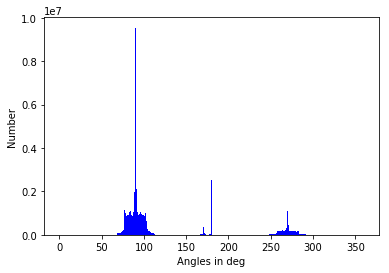

In [21]:
num_bins = 360
n, bins, patches = plt.hist(flangles,num_bins,color='blue')
#plt.plot(bins)
plt.xlabel("Angles in deg")
plt.ylabel("Number")
plt.show()

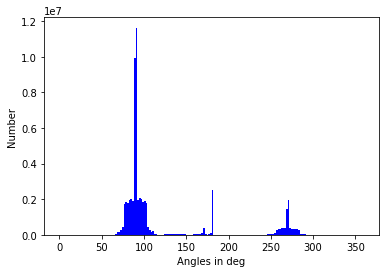

In [22]:
num_bins = 180
n, bins, patches = plt.hist(flangles,num_bins,color='blue')
#plt.plot(bins)
plt.xlabel("Angles in deg")
plt.ylabel("Number")
plt.show()